### Задача 1

Дана матрица объект-признак

X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
Является ли значимым получившееся уравнение регрессии?

In [57]:
import numpy as np

In [58]:
X = np.array([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
     [-0.18757272, 1.30337355, 5.12093014, 3.46363202],
     [-0.81094525, 1.82463398, 5.79686488, 1.86159445],
     [ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
     [ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
     [-0.62972637, 0.77750764, 2.84124027, 4.54410559],
     [ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
     [ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
     [ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
     [ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])

In [59]:
y = np.array([ 9.26193358, 9.700363 , 8.67214805, 8.74796974,
     6.18689108, 7.53312713, 7.57643777, 12.44965478,
     14.29010746, 6.68361218])

In [61]:
x1 = X[:,0]
x2 = X[:,1]
x3 = X[:,2]
x4 = X[:,3]
x1

array([ 1.22401313, -0.18757272, -0.81094525,  0.75129018,  0.00972362,
       -0.62972637,  2.29536229,  0.0920418 ,  2.39252799,  0.54983815])

In [62]:
# Получаем нужную форму
x12 = np.vstack([x1,x2]).T
x13 = np.vstack([x1,x3]).T
x14 = np.vstack([x1,x4]).T
x23 = np.vstack([x2,x3]).T
x24 = np.vstack([x2,x4]).T
x34 = np.vstack([x3,x4]).T
y = np.array(y)

In [63]:
x12.shape, y.shape

((10, 2), (10,))

In [64]:
# Добавляем единичный столбец
ones = np.ones((x12.shape[0], 1))
x12 = np.hstack((ones, x12))
x13 = np.hstack((ones, x13))
x14 = np.hstack((ones, x14))
x23 = np.hstack((ones, x23))
x24 = np.hstack((ones, x24))
x34 = np.hstack((ones, x34))
x12.shape

(10, 3)

In [66]:
# Запишем матрицы  𝑋⊤𝑋  и посчитаем определители
XTX12 = x12.T.dot(x12)
XTX13 = x13.T.dot(x13)
XTX14 = x14.T.dot(x14)
XTX23 = x23.T.dot(x23)
XTX24 = x24.T.dot(x24)
XTX34 = x34.T.dot(x34)
np.linalg.det(XTX12), np.linalg.det(XTX13), np.linalg.det(XTX14), np.linalg.det(XTX23), np.linalg.det(XTX24), np.linalg.det(XTX34)

(349.7782033818831,
 2835.3600226240965,
 1689.2124743606096,
 1427.8125776081442,
 701.7327364453139,
 4547.328074863329)

Определиетли не близки к 0, можно искать коэффициенты

In [68]:
XTX_inv12 = np.linalg.inv(XTX12)
b12 = XTX_inv12.dot(x12.T).dot(y)

XTX_inv13 = np.linalg.inv(XTX13)
b13 = XTX_inv13.dot(x13.T).dot(y)

XTX_inv14 = np.linalg.inv(XTX14)
b14 = XTX_inv14.dot(x14.T).dot(y)

XTX_inv23 = np.linalg.inv(XTX23)
b23 = XTX_inv23.dot(x23.T).dot(y)

XTX_inv24 = np.linalg.inv(XTX24)
b24 = XTX_inv24.dot(x24.T).dot(y)

XTX_inv34 = np.linalg.inv(XTX34)
b34 = XTX_inv34.dot(x34.T).dot(y)
b12, b13, b14, b23, b24, b34

(array([6.70781579, 0.40786841, 1.03360247]),
 array([3.62455695, 1.62531203, 1.21134979]),
 array([5.70686123, 0.68359949, 1.12650707]),
 array([2.48896193, 1.60611956, 0.86269915]),
 array([1.91685221, 1.74373667, 1.31971882]),
 array([3.64001086, 0.70753914, 1.04851745]))

In [69]:
def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

In [70]:
# Найдем предсказанные моделями значения
z12 = x12.dot(b12)
z13 = x13.dot(b13)
z14 = x14.dot(b14)
z23 = x23.dot(b23)
z24 = x24.dot(b24)
z34 = x34.dot(b34)
z12

array([ 9.59331437,  7.97848093,  8.26300303,  9.77801418,  8.75177457,
        7.25460411,  9.51697846,  9.09133833, 10.96600157,  9.90873522])

In [71]:
# Найдем коэффициенты детерминации и выберем лучший
r = {}
R12 = 1 - ((y - z12)**2).sum() / sum_of_squares(y)
r.update({'R12':R12})
R13 = 1 - ((y - z13)**2).sum() / sum_of_squares(y)
r.update({'R13':R13})
R14 = 1 - ((y - z14)**2).sum() / sum_of_squares(y)
r.update({'R14':R14})
R23 = 1 - ((y - z23)**2).sum() / sum_of_squares(y)
r.update({'R23':R23})
R24 = 1 - ((y - z24)**2).sum() / sum_of_squares(y)
r.update({'R24':R24})
R34 = 1 - ((y - z34)**2).sum() / sum_of_squares(y)
r.update({'R34':R34})
r

{'R12': 0.18113594742585215,
 'R13': 0.7634246238793152,
 'R14': 0.4532966783144078,
 'R23': 0.5479482734039011,
 'R24': 0.6062055761129932,
 'R34': 0.622441987650532}

In [72]:
Rmax = max(r, key=r.get)
Rmax, r[Rmax]

('R13', 0.7634246238793152)

Сочетание 1го и 3го признака оказывает наибольшее влияние на целевую переменную.

Проверим значимость уравнения регрессии.

In [73]:
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [74]:
n = x13.shape[0]
m = x13.shape[1] - 1

k1 = m
k2 = n - m - 1

k1, k2

(2, 7)

In [75]:
# Критическая облась
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

Критическая область:
$$\Omega_\alpha = \left( 4.73, \infty \right)$$

In [76]:
# Значение статистики:
F = (R13 / k1) / ((1 - R13) / k2)
F

11.29443912292265

Статистика попала в критическую область, уравнение регрессии признаётся значимым.

In [77]:
# Проверим встроенным методом
import statsmodels.api as sm
model = sm.OLS(y, x13)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     11.29
Date:                Wed, 15 Sep 2021   Prob (F-statistic):            0.00644
Time:                        11:52:43   Log-Likelihood:                -15.767
No. Observations:                  10   AIC:                             37.53
Df Residuals:                       7   BIC:                             38.44
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6246      1.261      2.875      0.0

Данные сходятся, расчеты выполнены верно

### Задача 2

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
Посчитайте коэффициент детерминации.
Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
(доп) Посчитать среднюю ошибку аппроксимации

In [78]:
x1 = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y1 = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [79]:
b1 = (np.mean(x1 * y1) - np.mean(x1) * np.mean(y1)) / (np.mean(x1 ** 2) - np.mean(x1) ** 2)
b0 = np.mean(y1) - b1 * np.mean(x1)

b0, b1

(444.1773573243596, 2.620538882402765)

Модель линейной регрессии имеет вид:
$$y = 444.18 + 2.62 \cdot x,$$ 
т.е. с увеличением зарплаты на 1 рубль кредитный скоринг возрастает на  2.62  балла.

Теперь построим по методу наименьших квадратов

In [80]:
x1.shape, y.shape

((10,), (10,))

In [81]:
ones = np.ones((x1.shape[0], 1)).T
x2 = np.vstack([ones, x1]).T
x2

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [82]:
XTX = x2.T.dot(x2)
np.linalg.det(XTX)

349464.00000000023

Определиетль не близок к 0, можно искать коэффициенты

In [83]:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x2.T).dot(y1)
b

array([444.17735732,   2.62053888])

In [84]:
b1, b[1], b0, b[0]

(2.620538882402765, 2.6205388824027676, 444.1773573243596, 444.17735732435915)

Коэффициенты, найденные разными методами, получились максимально близкими

Визуализируем даные

In [85]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

Text(0, 0.5, 'скоринг')

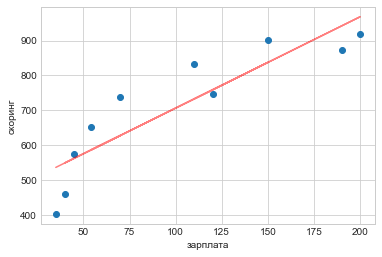

In [86]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('зарплата')
plt.ylabel('скоринг')

Посчитаем коэффициент детерминации

In [87]:
z1 = b0 + b1 * x1

In [88]:
R1 = 1 - ((y1 - z1)**2).sum() / sum_of_squares(y1)
R1

0.7876386635293686

Оценим построенное уравнение регрессии с помощью F-критерия Фишера.

In [89]:
n = x1.shape[0]
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 8)

In [90]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

5.317655071578714

Критическая область:
$$\Omega_\alpha = \left( 5.32, \infty \right)$$

In [91]:
F = (R1 / k1) / ((1 - R1) / k2)
F

29.67164085966451

Статистика попала в критическую область, уравнение регрессии признаётся значимым.

#### Посчитаем среднюю ошибку аппроксимации

In [92]:
def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

In [93]:
mean_approximation_error(y1, z1)

0.11469251843561709

Значение средней ошибки аппроксимации более 10%, но менее 15% - модель линейной регрессии выдает значения достаточно близкие к реальным данным.